# 비지도 학습(Unsupervised Learning)
- 라벨링이 되어 있지 않은 데이터 이용하는 학습 방법 - 클러스터링(clustering)

## k-평균 클러스터링(k-means clustering)
- N개의 데이터를 K개의 클러스터로 나누는 클러스터링 기법
- 각 데이터 포인트와 각 그룹 평균 간의 거리 구한 후 가장 가까운 클러스터로 배정함

Steps:
1) 그룹 평균 초기화
2) 그룹 할당
3) 평균 업데이트
4) 반복

- 사용하기 쉽다는 장점 있지만 가중치를 주지 않아 클러스터 간 데이터의 밀도 차이 있을 경우 클러스터링이 잘되지 않는 단점 존재
- 초기 K값 사용자 지정

In [1]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=100, n_features=2, centers=5, random_state=10)

In [2]:
print(X.shape)
print(y.shape)

(100, 2)
(100,)


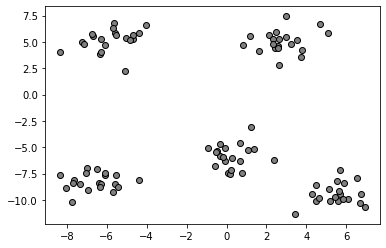

In [3]:
# 라벨링 되지 않은 데이터 플롯
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c='gray', edgecolor='black', marker='o')
plt.show()

In [5]:
# K-평균 클러스터링
from sklearn.cluster import KMeans
kmc = KMeans(n_clusters=5, init='random', max_iter=100, random_state=0)
# n_clusters: 클러스터링 하려는 집단의 수
# init: 첫 번째 평균값 어떻게 정할지
# max_iter: 알고리즘의 최대 반복 횟수
kmc.fit(X)
label_kmc = kmc.labels_ # 적합된 모형에서 데이터 어떻게 클러스터링 했는지 확인 가능

In [6]:
# 시각화를 위한 데이터 프레임 생성
import pandas as pd
kmc_columns = ['kmc_comp1', 'kmc_comp2']
X_kmc_df = pd.DataFrame(X, columns=kmc_columns)
X_kmc_df['target'] = y
X_kmc_df['label_kmc'] = label_kmc
X_kmc_df.head(5)

,kmc_comp1,kmc_comp2,target,label_kmc
0,-5.577854,5.872988,3,2
1,1.627832,4.178069,1,4
2,-6.950884,-9.024594,4,3
3,-0.952769,-5.034316,2,1
4,6.550104,-7.912339,0,0


In [7]:
# 타깃 클래스 종류 확인
print(set(X_kmc_df['target']))
print(set(X_kmc_df['label_kmc']))

{0, 1, 2, 3, 4}
{0, 1, 2, 3, 4}


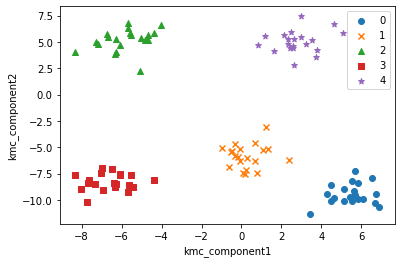

In [8]:
# K-평균 클러스터링 이용한 데이터 플롯
df = X_kmc_df
markers=['o','x','^','s','*']

for i, mark in enumerate(markers):
    df_i = df[df['label_kmc']==i]
    target_i = i
    X1 = df_i['kmc_comp1']
    X2 = df_i['kmc_comp2']
    plt.scatter(X1, X2, marker=mark, label=target_i)
    
plt.xlabel('kmc_component1')
plt.ylabel('kmc_component2')
plt.legend()
plt.show()

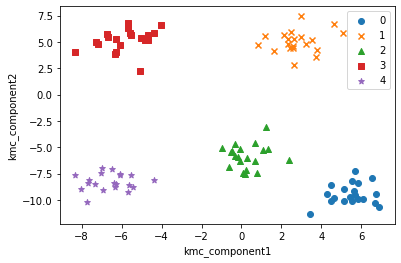

In [9]:
# 실제 타깃 플롯
df = X_kmc_df
markers=['o','x','^','s','*']

for i, mark in enumerate(markers):
    df_i = df[df['target']==i]
    target_i = i
    X1 = df_i['kmc_comp1']
    X2 = df_i['kmc_comp2']
    plt.scatter(X1, X2, marker=mark, label=target_i)
    
plt.xlabel('kmc_component1')
plt.ylabel('kmc_component2')
plt.legend()
plt.show()

In [10]:
# 모형 평가
from sklearn.metrics import silhouette_score
sil_score = silhouette_score(X, label_kmc)
print(sil_score)

0.7598181300128782


## 계층 클러스터링 (Hierarchical Clustering)
- 병합 계층 클러스터링(agglomerative hierarchical clustering) 
> 개별 데이터 포인트를 하나의 클러스터로 설정하고 시작. 유사도 높은 경우 합침,
> 처음에는 다수의 클러스터로 시작하지만 결국에는 데이터 셋 전체가 하나의 클러스터로 묶이는 방법
- 분할 계층 클러스터링(divisive hierarchical clustering)
> 전체 데이터 셋을 하나의 클러스터로 놓고 시작
> 가장 멀리 떨어진 데이터를 다른 클러스터로 분리 -> 마지막에는 데이터 개수만큼의 클러스터

- 덴드로그램(dendrogram)을 통해 시각화 가능
- 클러스터 개수 미리 지정할 필요 X

<병합 계층 클러스터링 연결 방법(linkage method)>
- 단일 연결(single linnkage)
-> 가장 가까운 거리에 있는 데이터 연결
- 완전 연결(complete linkage)
-> 클러스터 간 가장 비슷하지 않은 샘플 비교하여 합침
- Ward's 계층 클러스터링
-> 정보의 손실 최소화
-> 오차 제곱합 최소화
-> 클러스터 내에서 각 데이터 포인트가 클러스터 중심에서 얼마나 멀어져 있는지

In [11]:
# 데이터 생성
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=10, n_features=2, random_state=0)

# 생성된 데이터 차원 확인
print(X.shape)
print(y.shape)

(10, 2)
(10,)


In [12]:
# 병합 계층 클러스터링
from sklearn.cluster import AgglomerativeClustering
aggc = AgglomerativeClustering(n_clusters=None, distance_threshold=0, linkage='complete')
label_aggc = aggc.fit_predict(X)
print(label_aggc)

[8 9 6 4 5 2 7 3 1 0]


In [13]:
# 클러스 2개로 병합
aggc2 = AgglomerativeClustering(n_clusters=2, linkage='complete')
label_aggc2 = aggc2.fit_predict(X)
print(label_aggc2)

[0 0 0 0 0 0 1 0 0 0]


In [14]:
# 클러스터 3개로 병합
aggc3 = AgglomerativeClustering(n_clusters=3, linkage='complete')
label_aggc3 = aggc3.fit_predict(X)
print(label_aggc3)

[0 0 2 0 0 0 1 2 2 0]


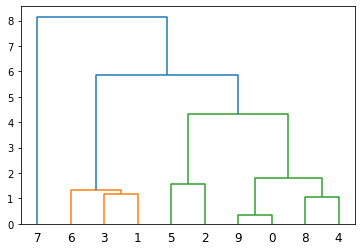

In [16]:
# 덴드로그램 시각화
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage
import matplotlib.pyplot as plt

linked = linkage(X, 'complete')
labels = label_aggc
dendrogram(linked, orientation='top', labels=labels, show_leaf_counts=True)
plt.show()

## DBSCAN
- Density-Based Spatial Clustering of Applications with Noise
- 밀도 기반
- 기본값은 유클리드 거리 사용, 클러스터 개수 사전에 정할 필요 X
- 필수 요소: 반경(eps), 최소한의 데이터 포인트 개수(min_samples)
- 핵심포인트(core point), 경계 포인트(border point, 핵심 포인트에서 eps 거리 내에 있는 포인트), 노이즈 포인트(noise point)
- DBSCAN을 한 데이터 셋에 여러 번 실행하면 핵심 포인트의 클러스터는 항상 같고 매번 같은 포인트를 노이즈로 라벨링. 경계포인트는 depends on 포인트 방문하는 순서.

In [17]:
from sklearn.datasets import make_moons # 반달 모양 데이터 생성
X, y = make_moons(n_samples=300, noise=0.05, random_state=0)

print(X.shape)
print(y.shape)

(300, 2)
(300,)


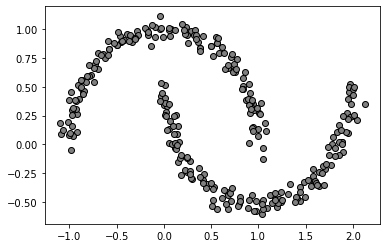

In [18]:
# 라벨링 되지 않은 데이터 플롯
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c='gray', edgecolor='black', marker='o')
plt.show()

In [19]:
# DBSCAN
from sklearn.cluster import DBSCAN
dbs = DBSCAN(eps=0.2) # 최소 샘플 개수 default=5
dbs.fit(X)
label_dbs = dbs.labels_
print(label_dbs)

[0 0 1 0 0 1 0 0 1 1 0 1 0 0 1 1 0 1 0 0 0 1 1 1 0 1 0 0 0 0 1 1 1 1 0 0 0
 0 0 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 1 1 1 0 0 0 1
 1 0 1 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0
 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 1 1 0 1 0 1 1 1
 1 0 0 1 0 0 0 1 1 1 0 1 0 1 1 0 1 1 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 1 0 0 1
 1 0 1 0 1 0 0 1 0 1 1 1 0 1 0 0 0 1 1 1 1 0 1 0 1 0 1 1 1 0 1 0 1 0 0 0 1
 1 0 1 0 1 1 0 0 1 0 1 1 0 1 1 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 0 1
 1 0 0 0 0 0 1 1 1 0 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 1 0 1 1 1 0 0 0 1 0 0
 0 1 1 0]


In [20]:
# 시각화를 위한 데이터프레임 생성
import pandas as pd
dbs_columns = ['dbs_comp1', 'dbs_comp2']
X_dbs_df = pd.DataFrame(X, columns=dbs_columns)
X_dbs_df['target'] = y
X_dbs_df['label_dbs'] = label_dbs
X_dbs_df.head()

,dbs_comp1,dbs_comp2,target,label_dbs
0,0.715413,-0.494089,1,0
1,0.246789,-0.240091,1,0
2,0.943261,0.346800,0,1
3,0.973742,-0.492901,1,0
4,1.239713,-0.411411,1,0


In [21]:
# 타깃 클래스 종류 확인
print(set(X_dbs_df['target']))
print(set(X_dbs_df['label_dbs']))

{0, 1}
{0, 1}


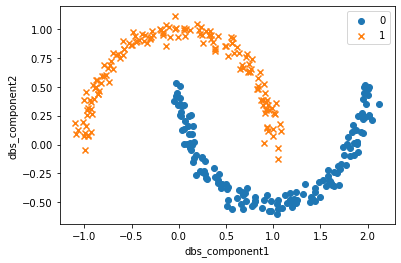

In [24]:
# DBSCAN을 이용한 데이터 플롯
df = X_dbs_df
markers=['o', 'x']

for i, mark in enumerate(markers):
    df_i = df[df['label_dbs']==i]
    target_i = i
    X1 = df_i['dbs_comp1']
    X2 = df_i['dbs_comp2']
    plt.scatter(X1, X2, marker=mark, label=target_i)
plt.xlabel('dbs_component1')
plt.ylabel('dbs_component2')
plt.legend()
plt.show()

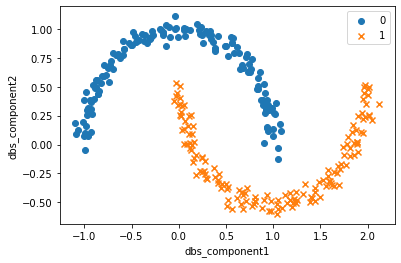

In [25]:
# 실제 타깃 플롯
df = X_dbs_df
markers=['o', 'x']

for i, mark in enumerate(markers):
    df_i = df[df['target']==i]
    target_i = i
    X1 = df_i['dbs_comp1']
    X2 = df_i['dbs_comp2']
    plt.scatter(X1, X2, marker=mark, label=target_i)
plt.xlabel('dbs_component1')
plt.ylabel('dbs_component2')
plt.legend()
plt.show()

In [26]:
# 모형 평가
from sklearn.metrics import silhouette_score
sil_score = silhouette_score(X, label_dbs)
print(sil_score)

0.3284782012631504


## 가우시안 혼합 모형 (Gaussian Mixture Model)
- 전체 집단 내부에 속한 하위 집단의 존재를 가정한 확률 모델
- 전체 집단의 확률 분포는 가우시안 분포 (정규분포)
- 3개 파라미터: 평균, 표준편차, 전체 분포에 대한 해당 하위 분포의 비율(해당 데이터가 하위 집단에 속할 확률)

### EM 알고리즘
E-step과 M-step을 반복하여 로그 가능도 함수 증가시키는 방법,
파라미터 추정에 사용

In [28]:
# 데이터 생성
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=200, n_features=2, centers=2, random_state=2)

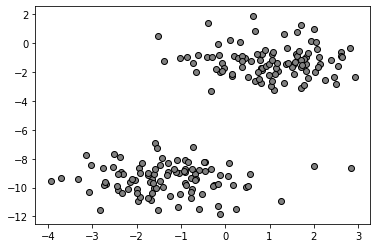

In [29]:
# 라벨링되지 않은 데이터 플롯
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c='gray', edgecolor='black', marker='o')
plt.show()

In [30]:
# 가우시안 혼합 모형
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=2, random_state=0)
gmm.fit(X)
label_gmm = gmm.predict(X)
print(label_gmm)

[1 0 1 1 0 1 0 0 1 0 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 0 0 1 0 0 1 0
 1 1 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0 1 1 1 0 1 0 1 0 1 0 0 1 0 0 1 1 1 0 0 1
 0 1 1 1 1 0 1 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0 1 0 0 0 1 0 0
 1 1 1 1 0 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 0 0 0 1
 1 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 1 0 0 0 0 0 1 1 0 1 0 1 0 1 1
 0 0 1 0 0 1 1 0 1 1 0 0 0 1 0]


In [31]:
# 시각화를 위한 데이터 프레임 생성
import pandas as pd
gmm_columns = ['gmm_comp1', 'gmm_comp2']
X_gmm_df = pd.DataFrame(X, columns=gmm_columns)
X_gmm_df['target'] = y
X_gmm_df['label_gmm'] = label_gmm
X_gmm_df.head()

,gmm_comp1,gmm_comp2,target,label_gmm
0,0.381155,-1.644815,1,1
1,-0.583904,-8.784059,0,0
2,1.830865,-1.425235,1,1
3,1.813135,-1.924671,1,1
4,-1.655771,-9.555946,0,0


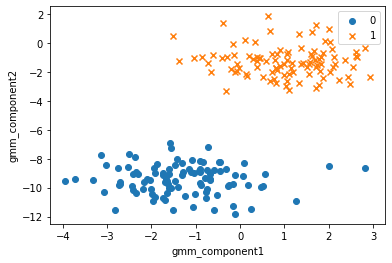

In [32]:
# 가우시안 혼합 모형을 이용한 데이터 플롯
df = X_gmm_df
markers=['o', 'x']

for i, mark in enumerate(markers):
    df_i = df[df['label_gmm']==i]
    target_i = i
    X1 = df_i['gmm_comp1']
    X2 = df_i['gmm_comp2']
    plt.scatter(X1, X2, marker=mark, label=target_i)
plt.xlabel('gmm_component1')
plt.ylabel('gmm_component2')
plt.legend()
plt.show()

In [33]:
# 모형 평가
from sklearn.metrics import silhouette_score
sil_score = silhouette_score(X, label_gmm)
print(sil_score)

0.7842908753561848
